<a href="https://colab.research.google.com/github/NafishaNower/Appendicitis-Detection-for-project/blob/main/Appendicities_Detection_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Weighted Ensemble Metrics:
Accuracy: 0.8837209302325582
Mean Absolute Error: 0.11627906976744186
Mean Squared Error: 0.11627906976744186
R-squared: 0.4956011730205281
Confusion Matrix (Weighted Ensamble):
 [[26  5]
 [ 5 50]]
F1 Score (weighted ensemble): 0.9090909090909091
MCC (weighted ensemble): 0.7478005865102639
Sensitivity (weighted ensemble): 0.9090909090909091
AUC (weighted ensemble): 0.9759530791788855


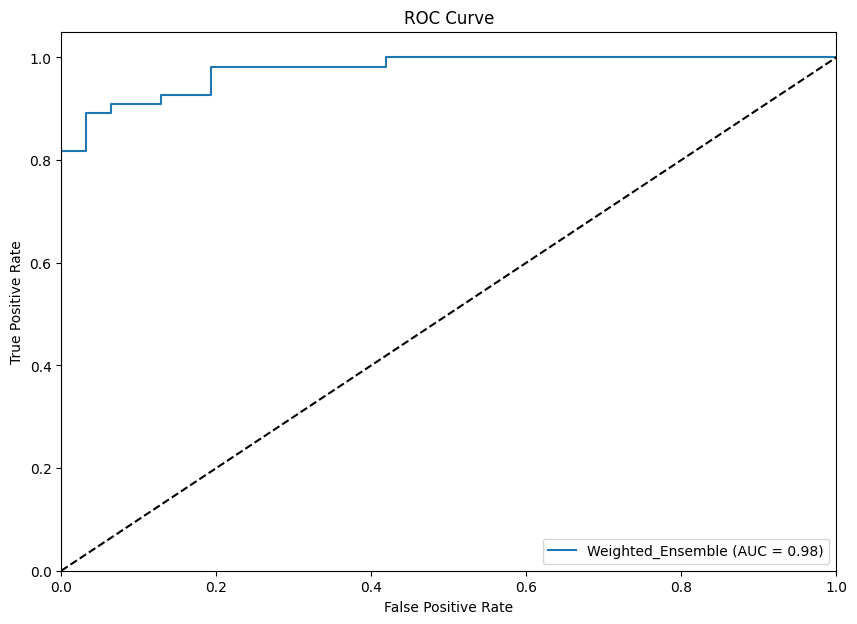

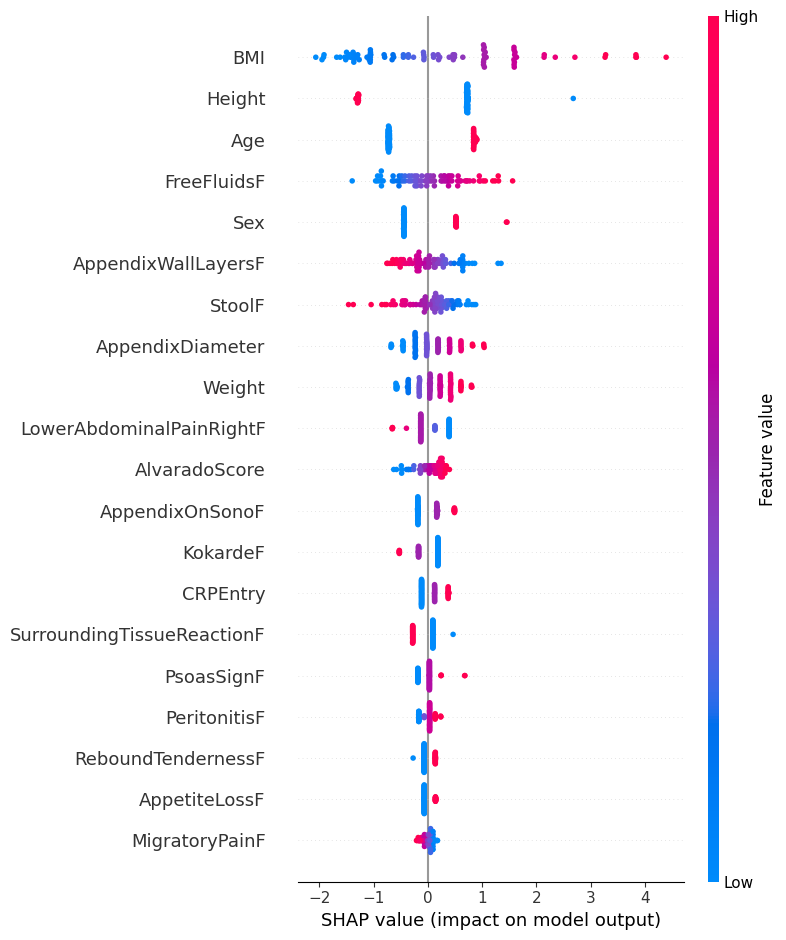

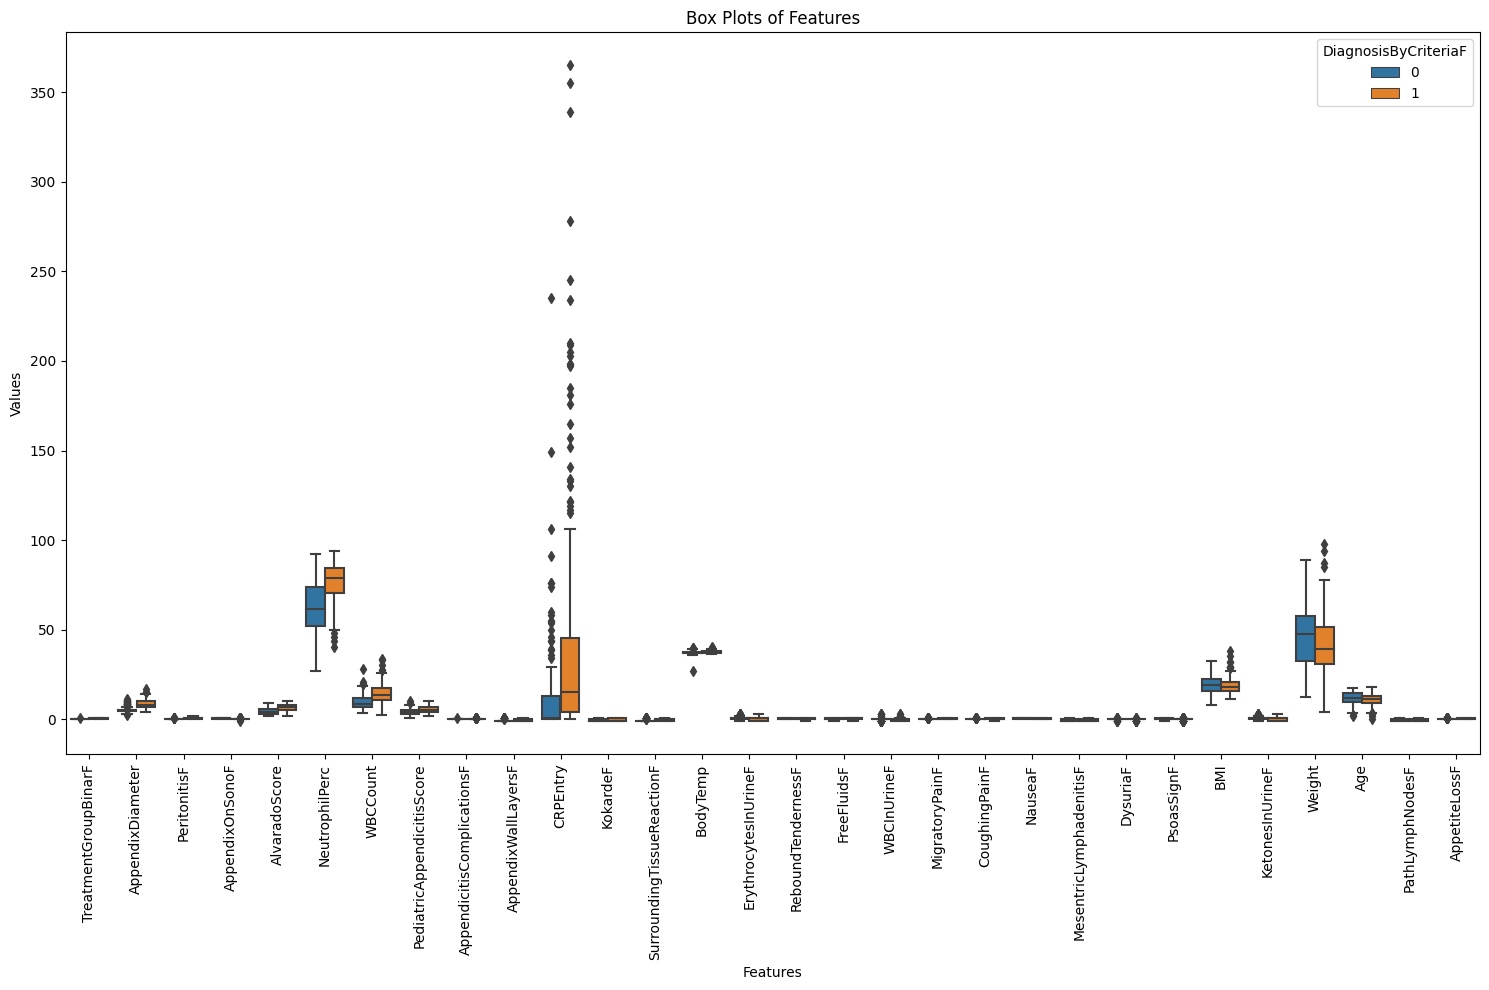

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


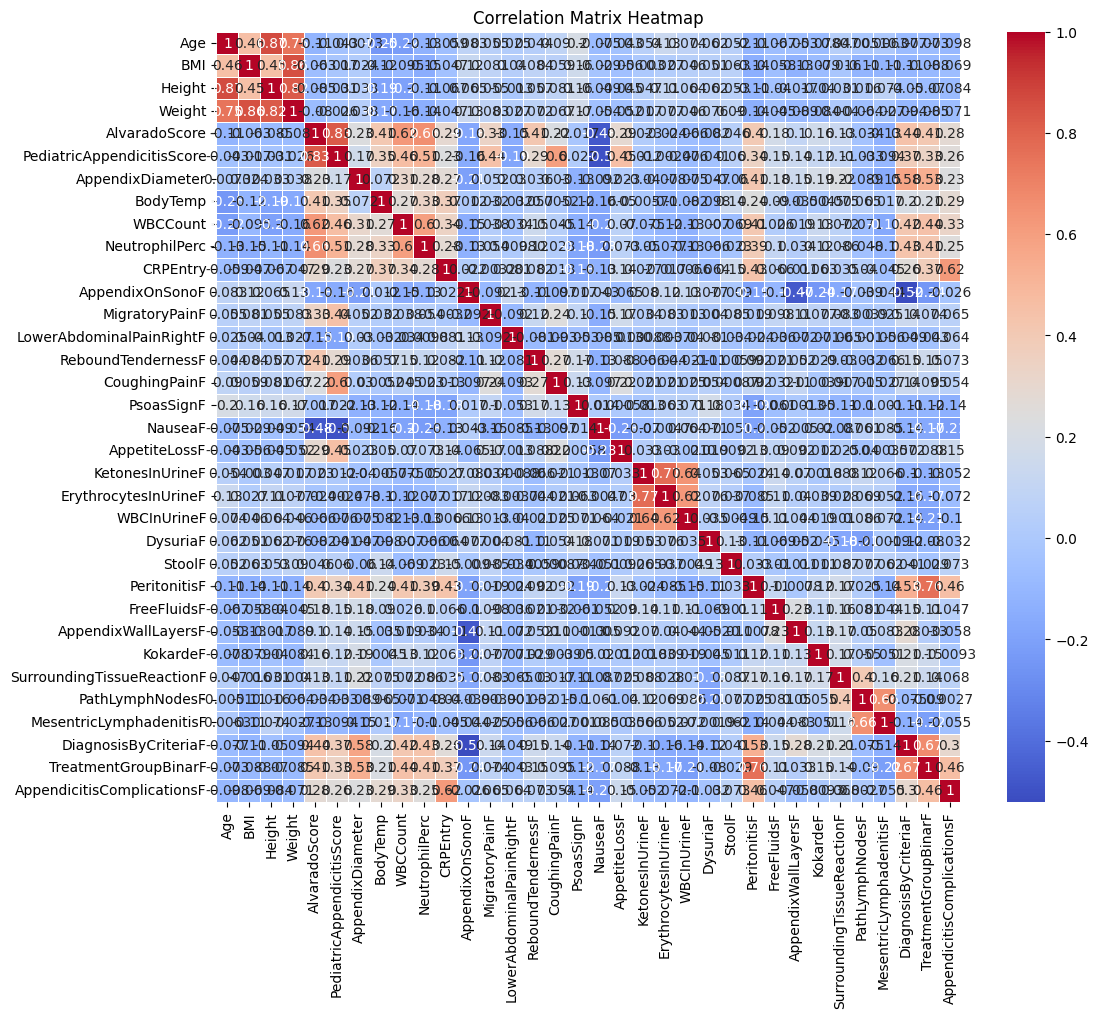

In [ ]:
###################DiagnosisByCriteria

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score




df = pd.read_csv("/content/drive/MyDrive/Dataset/appendicities.csv")



#num_of_rows = len(df)
#41 feature and 430 rows
#print(df.isnull().sum())



df.replace({"NA": float("nan"), "NaN": float("nan")}, inplace=True)  # standardize missing values.... inplace true means update main dataset
# drop uwanted columns, missing values more than 75%
df=df.drop(['TissuePerfusion'],axis=1)
df=df.drop(['BowelWallThick'],axis=1)
df=df.drop(['Ileus'],axis=1)
df=df.drop(['FecalImpaction'],axis=1)
df=df.drop(['Meteorism'],axis=1)
df=df.drop(['Enteritis'],axis=1)




# Fill missing values with interpolation
df.interpolate(method='linear', inplace=True)
# Linear interpolation is a method for estimating values between two known data points by assuming a linear relationship between them.
#It calculates values for missing data points by drawing a straight line between two adjacent data points and finding the value that lies on that line.




# factorization to convert categorical values to numerical value. Label encoding is simply
# assigning an integer value to every possible value of a categorical variable
# It assigns a unique numerical code to each unique category in the column.

#(array([0, 1, 1, 0, 2]), Index(['Cat', 'Dog', 'Fish'], dtype='object'))
# The first element (at index 0) is an array containing the numerical factors corresponding to the original categorical values


df['AppendixOnSonoF'] = pd.factorize(df['AppendixOnSono'])[0]
df['MigratoryPainF'] = pd.factorize(df['MigratoryPain'])[0]
df['LowerAbdominalPainRightF'] = pd.factorize(df['LowerAbdominalPainRight'])[0]
df['ReboundTendernessF'] = pd.factorize(df['ReboundTenderness'])[0]
df['CoughingPainF'] = pd.factorize(df['CoughingPain'])[0]
df['PsoasSignF'] = pd.factorize(df['PsoasSign'])[0]
df['NauseaF'] = pd.factorize(df['Nausea'])[0]
df['AppetiteLossF'] = pd.factorize(df['AppetiteLoss'])[0]
df['KetonesInUrineF'] = pd.factorize(df['KetonesInUrine'])[0]
df['ErythrocytesInUrineF'] = pd.factorize(df['ErythrocytesInUrine'])[0]
df['WBCInUrineF'] = pd.factorize(df['WBCInUrine'])[0]
df['DysuriaF'] = pd.factorize(df['Dysuria'])[0]
df['StoolF'] = pd.factorize(df['Stool'])[0]
df['PeritonitisF'] = pd.factorize(df['Peritonitis'])[0]
df['FreeFluidsF'] = pd.factorize(df['FreeFluids'])[0]
df['AppendixWallLayersF'] = pd.factorize(df['AppendixWallLayers'])[0]
df['KokardeF'] = pd.factorize(df['Kokarde'])[0]
df['SurroundingTissueReactionF'] = pd.factorize(df['SurroundingTissueReaction'])[0]
df['PathLymphNodesF'] = pd.factorize(df['PathLymphNodes'])[0]
df['MesentricLymphadenitisF'] = pd.factorize(df['MesentricLymphadenitis'])[0]
df['DiagnosisByCriteriaF'] = pd.factorize(df['DiagnosisByCriteria'])[0]
df['TreatmentGroupBinarF'] = pd.factorize(df['TreatmentGroupBinar'])[0]
df['AppendicitisComplicationsF'] = pd.factorize(df['AppendicitisComplications'])[0]





# drop actual columns

df=df.drop(['AppendixOnSono'],axis=1)
df=df.drop(['MigratoryPain'],axis=1)
df=df.drop(['LowerAbdominalPainRight'],axis=1)
df=df.drop(['ReboundTenderness'],axis=1)
df=df.drop(['CoughingPain'],axis=1)
df=df.drop(['PsoasSign'],axis=1)
df=df.drop(['Nausea'],axis=1)
df=df.drop(['AppetiteLoss'],axis=1)
df=df.drop(['KetonesInUrine'],axis=1)
df=df.drop(['ErythrocytesInUrine'],axis=1)
df=df.drop(['WBCInUrine'],axis=1)
df=df.drop(['Dysuria'],axis=1)
df=df.drop(['Stool'],axis=1)
df=df.drop(['Peritonitis'],axis=1)
df=df.drop(['FreeFluids'],axis=1)
df=df.drop(['AppendixWallLayers'],axis=1)
df=df.drop(['Kokarde'],axis=1)
df=df.drop(['SurroundingTissueReaction'],axis=1)
df=df.drop(['PathLymphNodes'],axis=1)
df=df.drop(['MesentricLymphadenitis'],axis=1)

df=df.drop(['DiagnosisByCriteria'],axis=1)
df=df.drop(['TreatmentGroupBinar'],axis=1)
df=df.drop(['AppendicitisComplications'],axis=1)



# define test and train
X = df.drop('DiagnosisByCriteriaF', axis=1)
y = df['DiagnosisByCriteriaF']






correlations = df.corr()['DiagnosisByCriteriaF'].abs().sort_values(ascending=False)
k = 30  # You can adjust this value as needed
selected_features = correlations.index[1:k+1]  # Exclude the target variable
X_selected = X[selected_features]

# Split the data into training and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Use KNNImputer to impute missing values
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


#####WEIGHTED ENSAMBLE MODEL BUILDING:::::::::::
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg.fit(X_train_imputed, y_train)
random_forest.fit(X_train_imputed, y_train)
     # Make predictions on the test data using the individual models
y_pred_log_reg = log_reg.predict(X_test_imputed)
y_pred_random_forest = random_forest.predict(X_test_imputed)
    # Define weights for the models
weight_log_reg = 0.6
weight_random_forest = 0.4
    # Calculate the weighted ensemble predictions
weighted_ensemble_pred = (weight_log_reg * y_pred_log_reg + weight_random_forest * y_pred_random_forest).round()



#####CALCULATE MSE<MAE, R2, F1, CONFUSION MATRIX, AUC, ROC, MCC, SENSITIVITY:::::::::
acc_weighted_ensemble = accuracy_score(y_test, weighted_ensemble_pred)
mae_weighted_ensemble = mean_absolute_error(y_test, weighted_ensemble_pred)
mse_weighted_ensemble = mean_squared_error(y_test, weighted_ensemble_pred)
r2_weighted_ensemble = r2_score(y_test, weighted_ensemble_pred)
conf_matrix_weighted_ensemble = confusion_matrix(y_test, weighted_ensemble_pred)
y_prob_weighted_ensemble = (weight_log_reg * log_reg.predict_proba(X_test_imputed)[:, 1] +
                            weight_random_forest * random_forest.predict_proba(X_test_imputed)[:, 1])
fpr_weighted_ensemble, tpr_weighted_ensemble, _ = roc_curve(y_test, y_prob_weighted_ensemble)
auc_weighted_ensemble = roc_auc_score(y_test, y_prob_weighted_ensemble)
f1_weighted_ensemble = f1_score(y_test, weighted_ensemble_pred)
mcc_weighted_ensemble = matthews_corrcoef(y_test, weighted_ensemble_pred)
sensitivity_weighted_ensemble = recall_score(y_test, weighted_ensemble_pred)





print("Weighted Ensemble Metrics:")
print("Accuracy:", acc_weighted_ensemble)
print("Mean Absolute Error:", mae_weighted_ensemble)
print("Mean Squared Error:", mse_weighted_ensemble)
print("R-squared:", r2_weighted_ensemble)
print("Confusion Matrix (Weighted Ensamble):\n", conf_matrix_weighted_ensemble)
print("F1 Score (weighted ensemble):", f1_weighted_ensemble)
print("MCC (weighted ensemble):", mcc_weighted_ensemble)
print("Sensitivity (weighted ensemble):", sensitivity_weighted_ensemble)
print("AUC (weighted ensemble):", auc_weighted_ensemble)


#####PRINT ROC CURVE::::::::
plt.figure(figsize=(10, 7))  #This line creates a new figure for the ROC curve plot with a specified figure size of 10 inches in width and 7 inches in height.
plt.plot(fpr_weighted_ensemble, tpr_weighted_ensemble, label='Weighted_Ensemble (AUC = {:.2f})'.format(auc_weighted_ensemble))
#fpr_logreg (false positive rate) on the x-axis and tpr_logreg (true positive rate) on the y-axis.
#plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--') #adds a dashed diagonal line (45-degree line) to the plot, representing the ROC curve for a random classifier
plt.xlim([0.0, 1.0])#sets the limits for the x-axis, specifying the range from 0 to 1.
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right') # ensure lebels will be on lower right
plt.show()









#####SHAP CALCULATION FOR WEIGHTED ENSAMBLE MODEL:::::::::::
explainer_log_reg = shap.Explainer(log_reg, X_train_imputed)
shap_values_log_reg = explainer_log_reg(X_test_imputed)
explainer_rf = shap.TreeExplainer(random_forest)
shap_values_rf = explainer_rf(X_test_imputed)
#print("Shape of X_test_imputed:", X_test_imputed.shape)
#print("Shape of shap_values_log_reg:", shap_values_log_reg.shape)
#print("Shape of shap_values_rf:", shap_values_rf.shape)
shap_values_rf_selected = shap_values_rf[:, :, 1]
shap_values_weighted_ensemble = (
    weight_log_reg * shap_values_log_reg + weight_random_forest * shap_values_rf_selected
)
shap.summary_plot(shap_values_weighted_ensemble, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Ensemble Model)")
plt.show()
#shap.summary_plot(shap_values_log_reg, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Logistic Regression)")
#plt.show()
#shap.summary_plot(shap_values, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Random Forest)")
#shap_values_combined = np.concatenate((shap_values_log_reg[:, :, np.newaxis], shap_values_rf_selected[:, :, np.newaxis]), axis=2)

# Now you can use shap_values_combined for the summary plot
#shap.summary_plot(shap_values_combined, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Ensemble Model)")
#plt.show()





###############################################################
#Receiver Operating Characteristic (ROC)
#y_test: The true binary labels for the testing data. These are the actual outcomes you are trying to predict
#y_prob_logreg: The predicted probabilities of belonging to the positive class for the testing data, which you calculated in the previous step.
#fpr_logreg: An array of false positive rates (FPR) at various thresholds.
#tpr_logreg: An array of true positive rates (TPR), which is also the same as the sensitivity or recall, at various thresholds.
#_: This variable is a placeholder for thresholds
#The ROC curve is a graphical representation of a binary classifier's performance
#It plots the true positive rate (TPR) on the y-axis (also known as sensitivity or recall) against the false positive rate (FPR) on the x-axis.


# Calculate AUC
#AUC, which is a measure of the classifier's ability to distinguish between positive and negative classes.
#A higher AUC value indicates better classification performance.
#A perfect classifier has an AUC of 1
###############################################################







# BOXPLOT OF ALL FEATURES::::::::::::::::
plt.figure(figsize=(15, 10))
df_box = pd.concat([X_train, y_train], axis=1)   #merge test and train data for box
melted_df = df_box.melt(id_vars='DiagnosisByCriteriaF', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='DiagnosisByCriteriaF', data=melted_df) #The 'DiagnosisByCriteriaF' column is used for coloring the boxes, effectively distinguishing different categories.
plt.title('Box Plots of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='DiagnosisByCriteriaF', loc='upper right')
plt.tight_layout() #This line ensures that the plot elements are appropriately arranged and spaced for better visual presentation.
plt.show()


# VISUALIZATION OF CORRELATION USING HEATMAP::::::::::
correlation_matrix = df.corr()
#This line calculates the correlation coefficients between all pairs of numerical features in the DataFrame df.
#The result is stored in the variable correlation_matrix, which becomes a square matrix where each entry represents the correlation between two features.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # add annotation, 0.5 width of the lines that separate the cells in the heatmap.
plt.title("Correlation Matrix Heatmap")
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Weighted Ensemble Metrics:
Accuracy: 0.8837209302325582
Mean Absolute Error: 0.11627906976744186
Mean Squared Error: 0.11627906976744186
R-squared: 0.5023148148148147
Confusion Matrix (Weighted Ensamble):
 [[47  7]
 [ 3 29]]
F1 Score (weighted ensemble): 0.8529411764705882
MCC (weighted ensemble): 0.7609294525034781
Sensitivity (weighted ensemble): 0.90625
AUC (weighted ensemble): 0.9675925925925926


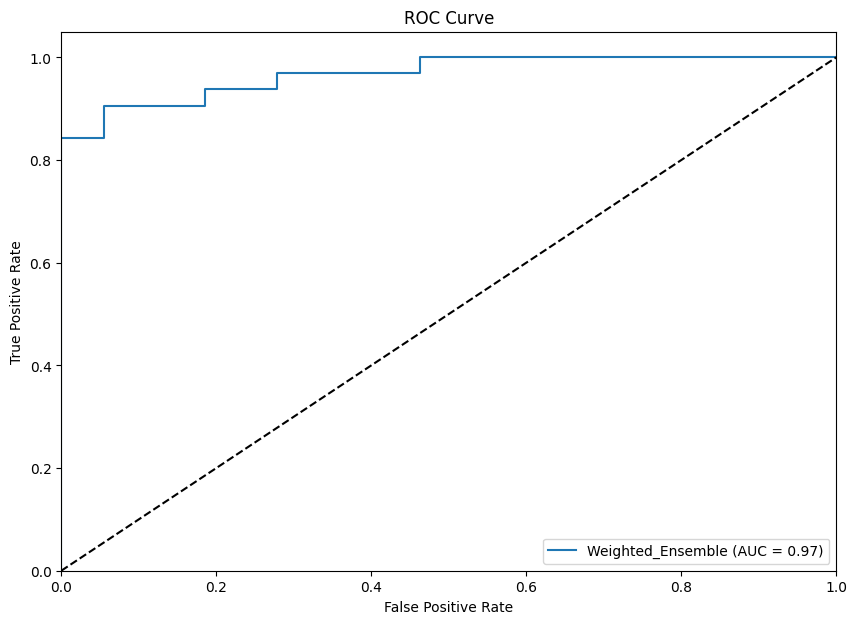

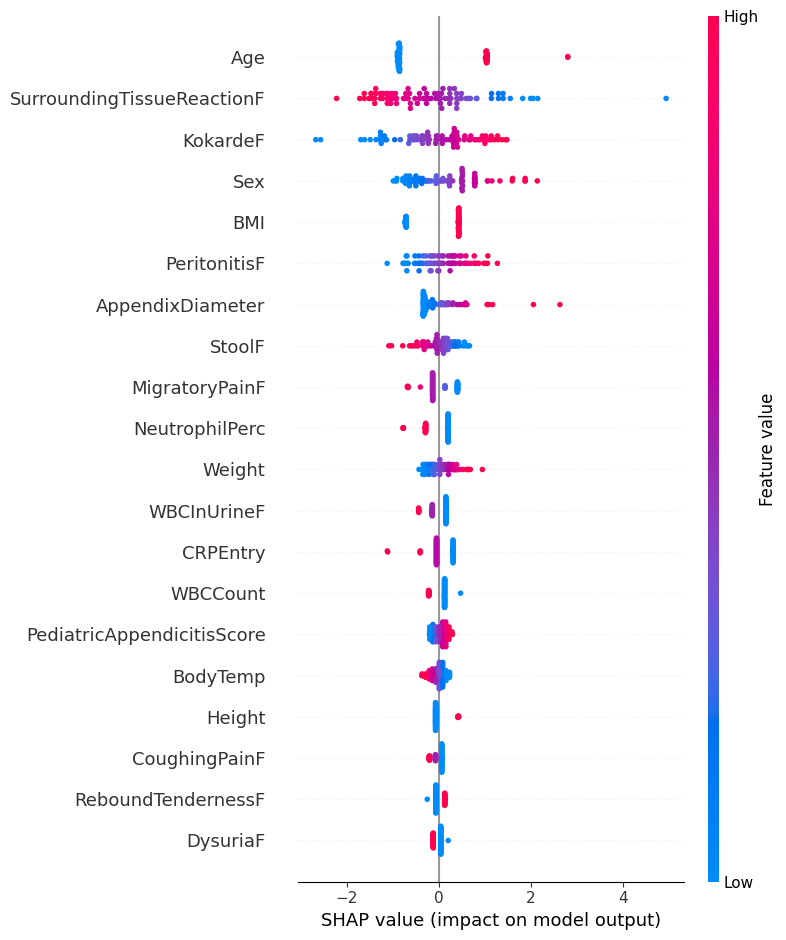

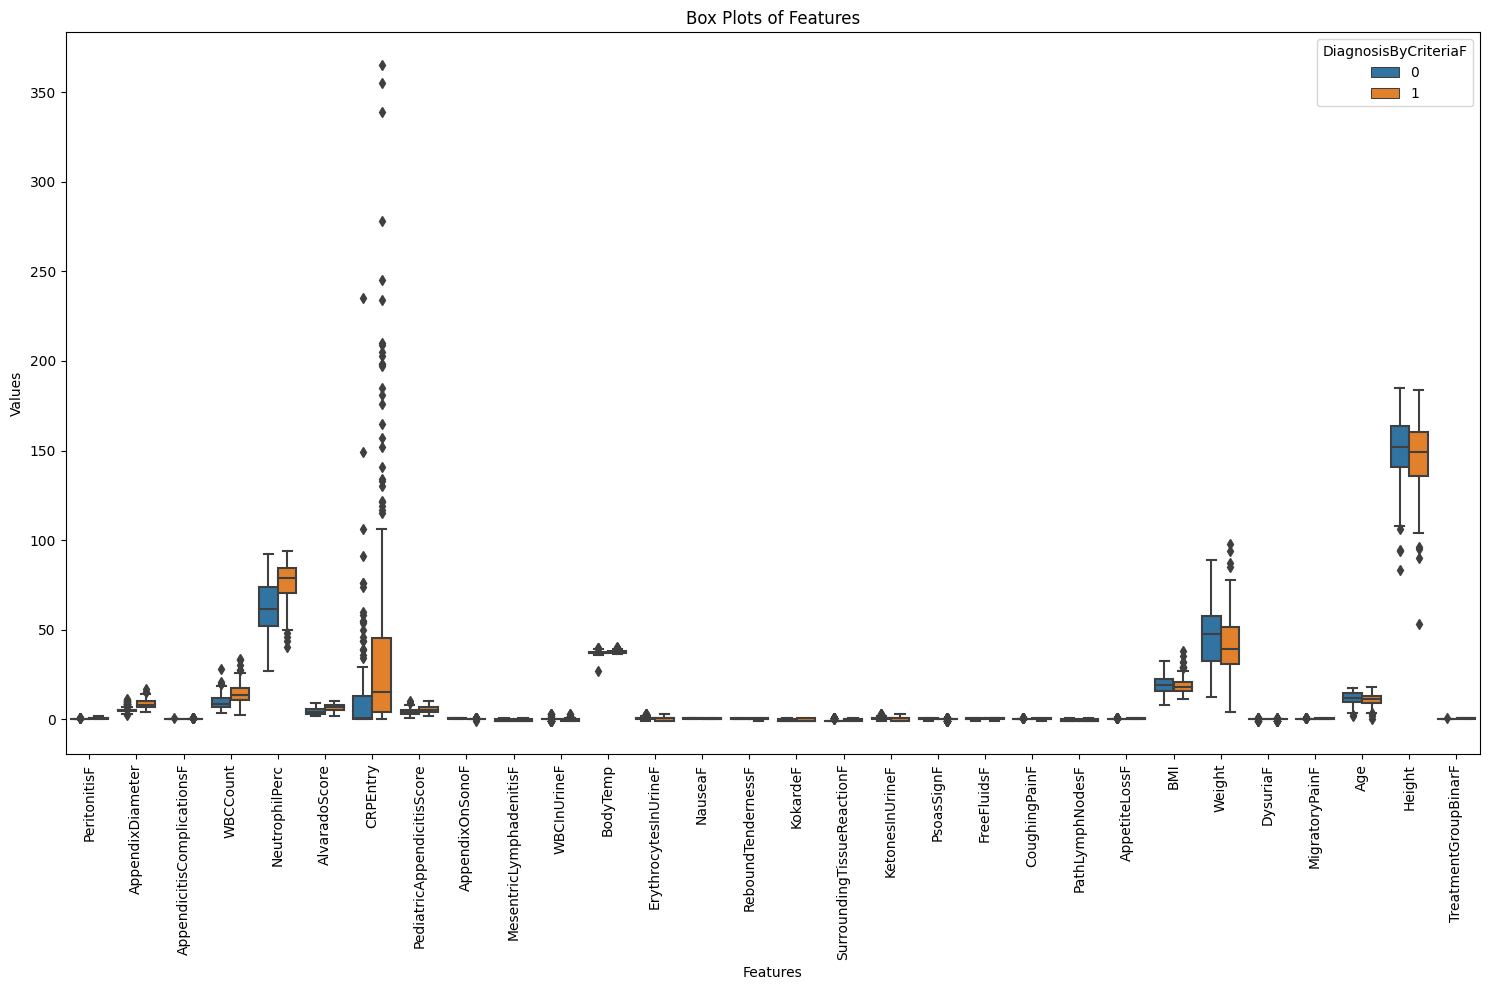

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


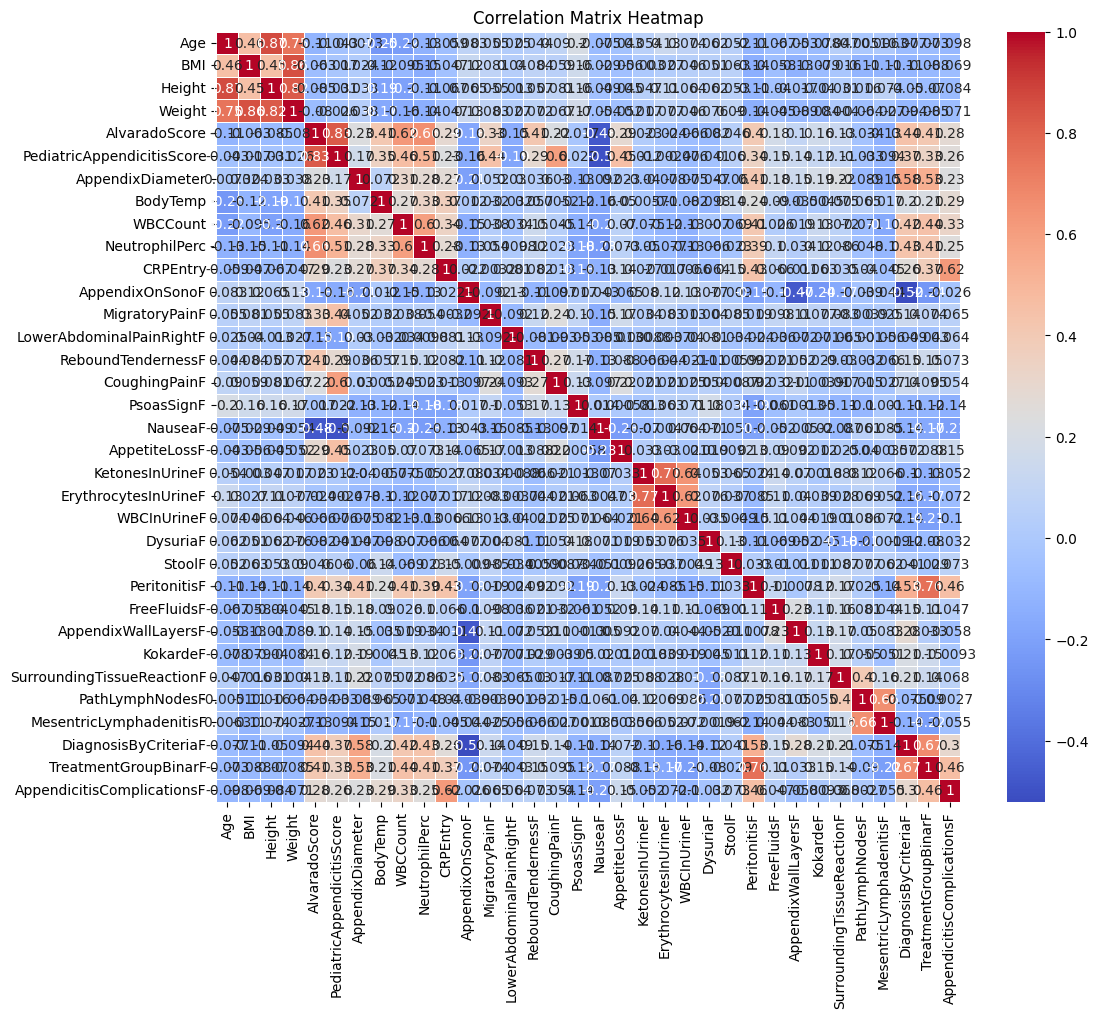

In [ ]:
###########TreatmentGroupBinar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score




df = pd.read_csv("/content/drive/MyDrive/Dataset/appendicities.csv")



#num_of_rows = len(df)
#41 feature and 430 rows
#print(df.isnull().sum())



df.replace({"NA": float("nan"), "NaN": float("nan")}, inplace=True)  # standardize missing values.... inplace true means update main dataset
# drop uwanted columns, missing values more than 75%
df=df.drop(['TissuePerfusion'],axis=1)
df=df.drop(['BowelWallThick'],axis=1)
df=df.drop(['Ileus'],axis=1)
df=df.drop(['FecalImpaction'],axis=1)
df=df.drop(['Meteorism'],axis=1)
df=df.drop(['Enteritis'],axis=1)




# Fill missing values with interpolation
df.interpolate(method='linear', inplace=True)
# Linear interpolation is a method for estimating values between two known data points by assuming a linear relationship between them.
#It calculates values for missing data points by drawing a straight line between two adjacent data points and finding the value that lies on that line.




# factorization to convert categorical values to numerical value. Label encoding is simply
# assigning an integer value to every possible value of a categorical variable
# It assigns a unique numerical code to each unique category in the column.

#(array([0, 1, 1, 0, 2]), Index(['Cat', 'Dog', 'Fish'], dtype='object'))
# The first element (at index 0) is an array containing the numerical factors corresponding to the original categorical values


df['AppendixOnSonoF'] = pd.factorize(df['AppendixOnSono'])[0]
df['MigratoryPainF'] = pd.factorize(df['MigratoryPain'])[0]
df['LowerAbdominalPainRightF'] = pd.factorize(df['LowerAbdominalPainRight'])[0]
df['ReboundTendernessF'] = pd.factorize(df['ReboundTenderness'])[0]
df['CoughingPainF'] = pd.factorize(df['CoughingPain'])[0]
df['PsoasSignF'] = pd.factorize(df['PsoasSign'])[0]
df['NauseaF'] = pd.factorize(df['Nausea'])[0]
df['AppetiteLossF'] = pd.factorize(df['AppetiteLoss'])[0]
df['KetonesInUrineF'] = pd.factorize(df['KetonesInUrine'])[0]
df['ErythrocytesInUrineF'] = pd.factorize(df['ErythrocytesInUrine'])[0]
df['WBCInUrineF'] = pd.factorize(df['WBCInUrine'])[0]
df['DysuriaF'] = pd.factorize(df['Dysuria'])[0]
df['StoolF'] = pd.factorize(df['Stool'])[0]
df['PeritonitisF'] = pd.factorize(df['Peritonitis'])[0]
df['FreeFluidsF'] = pd.factorize(df['FreeFluids'])[0]
df['AppendixWallLayersF'] = pd.factorize(df['AppendixWallLayers'])[0]
df['KokardeF'] = pd.factorize(df['Kokarde'])[0]
df['SurroundingTissueReactionF'] = pd.factorize(df['SurroundingTissueReaction'])[0]
df['PathLymphNodesF'] = pd.factorize(df['PathLymphNodes'])[0]
df['MesentricLymphadenitisF'] = pd.factorize(df['MesentricLymphadenitis'])[0]
df['DiagnosisByCriteriaF'] = pd.factorize(df['DiagnosisByCriteria'])[0]
df['TreatmentGroupBinarF'] = pd.factorize(df['TreatmentGroupBinar'])[0]
df['AppendicitisComplicationsF'] = pd.factorize(df['AppendicitisComplications'])[0]





# drop actual columns

df=df.drop(['AppendixOnSono'],axis=1)
df=df.drop(['MigratoryPain'],axis=1)
df=df.drop(['LowerAbdominalPainRight'],axis=1)
df=df.drop(['ReboundTenderness'],axis=1)
df=df.drop(['CoughingPain'],axis=1)
df=df.drop(['PsoasSign'],axis=1)
df=df.drop(['Nausea'],axis=1)
df=df.drop(['AppetiteLoss'],axis=1)
df=df.drop(['KetonesInUrine'],axis=1)
df=df.drop(['ErythrocytesInUrine'],axis=1)
df=df.drop(['WBCInUrine'],axis=1)
df=df.drop(['Dysuria'],axis=1)
df=df.drop(['Stool'],axis=1)
df=df.drop(['Peritonitis'],axis=1)
df=df.drop(['FreeFluids'],axis=1)
df=df.drop(['AppendixWallLayers'],axis=1)
df=df.drop(['Kokarde'],axis=1)
df=df.drop(['SurroundingTissueReaction'],axis=1)
df=df.drop(['PathLymphNodes'],axis=1)
df=df.drop(['MesentricLymphadenitis'],axis=1)

df=df.drop(['DiagnosisByCriteria'],axis=1)
df=df.drop(['TreatmentGroupBinar'],axis=1)
df=df.drop(['AppendicitisComplications'],axis=1)



# define test and train
X = df.drop('TreatmentGroupBinarF', axis=1)
y = df['TreatmentGroupBinarF']






correlations = df.corr()['TreatmentGroupBinarF'].abs().sort_values(ascending=False)
k = 30  # You can adjust this value as needed
selected_features = correlations.index[1:k+1]  # Exclude the target variable
X_selected = X[selected_features]

# Split the data into training and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Use KNNImputer to impute missing values
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


#####WEIGHTED ENSAMBLE MODEL BUILDING:::::::::::
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg.fit(X_train_imputed, y_train)
random_forest.fit(X_train_imputed, y_train)
     # Make predictions on the test data using the individual models
y_pred_log_reg = log_reg.predict(X_test_imputed)
y_pred_random_forest = random_forest.predict(X_test_imputed)
    # Define weights for the models
weight_log_reg = 0.6
weight_random_forest = 0.4
    # Calculate the weighted ensemble predictions
weighted_ensemble_pred = (weight_log_reg * y_pred_log_reg + weight_random_forest * y_pred_random_forest).round()



#####CALCULATE MSE<MAE, R2, F1, CONFUSION MATRIX, AUC, ROC, MCC, SENSITIVITY:::::::::
acc_weighted_ensemble = accuracy_score(y_test, weighted_ensemble_pred)
mae_weighted_ensemble = mean_absolute_error(y_test, weighted_ensemble_pred)
mse_weighted_ensemble = mean_squared_error(y_test, weighted_ensemble_pred)
r2_weighted_ensemble = r2_score(y_test, weighted_ensemble_pred)
conf_matrix_weighted_ensemble = confusion_matrix(y_test, weighted_ensemble_pred)
y_prob_weighted_ensemble = (weight_log_reg * log_reg.predict_proba(X_test_imputed)[:, 1] +
                            weight_random_forest * random_forest.predict_proba(X_test_imputed)[:, 1])
fpr_weighted_ensemble, tpr_weighted_ensemble, _ = roc_curve(y_test, y_prob_weighted_ensemble)
auc_weighted_ensemble = roc_auc_score(y_test, y_prob_weighted_ensemble)
f1_weighted_ensemble = f1_score(y_test, weighted_ensemble_pred)
mcc_weighted_ensemble = matthews_corrcoef(y_test, weighted_ensemble_pred)
sensitivity_weighted_ensemble = recall_score(y_test, weighted_ensemble_pred)





print("Weighted Ensemble Metrics:")
print("Accuracy:", acc_weighted_ensemble)
print("Mean Absolute Error:", mae_weighted_ensemble)
print("Mean Squared Error:", mse_weighted_ensemble)
print("R-squared:", r2_weighted_ensemble)
print("Confusion Matrix (Weighted Ensamble):\n", conf_matrix_weighted_ensemble)
print("F1 Score (weighted ensemble):", f1_weighted_ensemble)
print("MCC (weighted ensemble):", mcc_weighted_ensemble)
print("Sensitivity (weighted ensemble):", sensitivity_weighted_ensemble)
print("AUC (weighted ensemble):", auc_weighted_ensemble)


#####PRINT ROC CURVE::::::::
plt.figure(figsize=(10, 7))  #This line creates a new figure for the ROC curve plot with a specified figure size of 10 inches in width and 7 inches in height.
plt.plot(fpr_weighted_ensemble, tpr_weighted_ensemble, label='Weighted_Ensemble (AUC = {:.2f})'.format(auc_weighted_ensemble))
#fpr_logreg (false positive rate) on the x-axis and tpr_logreg (true positive rate) on the y-axis.
#plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--') #adds a dashed diagonal line (45-degree line) to the plot, representing the ROC curve for a random classifier
plt.xlim([0.0, 1.0])#sets the limits for the x-axis, specifying the range from 0 to 1.
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right') # ensure lebels will be on lower right
plt.show()









#####SHAP CALCULATION FOR WEIGHTED ENSAMBLE MODEL:::::::::::
explainer_log_reg = shap.Explainer(log_reg, X_train_imputed)
shap_values_log_reg = explainer_log_reg(X_test_imputed)
explainer_rf = shap.TreeExplainer(random_forest)
shap_values_rf = explainer_rf(X_test_imputed)
#print("Shape of X_test_imputed:", X_test_imputed.shape)
#print("Shape of shap_values_log_reg:", shap_values_log_reg.shape)
#print("Shape of shap_values_rf:", shap_values_rf.shape)
shap_values_rf_selected = shap_values_rf[:, :, 1]
shap_values_weighted_ensemble = (
    weight_log_reg * shap_values_log_reg + weight_random_forest * shap_values_rf_selected
)
shap.summary_plot(shap_values_weighted_ensemble, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Ensemble Model)")
plt.show()
#shap.summary_plot(shap_values_log_reg, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Logistic Regression)")
#plt.show()
#shap.summary_plot(shap_values, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Random Forest)")
#shap_values_combined = np.concatenate((shap_values_log_reg[:, :, np.newaxis], shap_values_rf_selected[:, :, np.newaxis]), axis=2)

# Now you can use shap_values_combined for the summary plot
#shap.summary_plot(shap_values_combined, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Ensemble Model)")
#plt.show()





###############################################################
#Receiver Operating Characteristic (ROC)
#y_test: The true binary labels for the testing data. These are the actual outcomes you are trying to predict
#y_prob_logreg: The predicted probabilities of belonging to the positive class for the testing data, which you calculated in the previous step.
#fpr_logreg: An array of false positive rates (FPR) at various thresholds.
#tpr_logreg: An array of true positive rates (TPR), which is also the same as the sensitivity or recall, at various thresholds.
#_: This variable is a placeholder for thresholds
#The ROC curve is a graphical representation of a binary classifier's performance
#It plots the true positive rate (TPR) on the y-axis (also known as sensitivity or recall) against the false positive rate (FPR) on the x-axis.


# Calculate AUC
#AUC, which is a measure of the classifier's ability to distinguish between positive and negative classes.
#A higher AUC value indicates better classification performance.
#A perfect classifier has an AUC of 1
###############################################################







# BOXPLOT OF ALL FEATURES::::::::::::::::
plt.figure(figsize=(15, 10))
df_box = pd.concat([X_train, y_train], axis=1)   #merge test and train data for box
melted_df = df_box.melt(id_vars='DiagnosisByCriteriaF', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='DiagnosisByCriteriaF', data=melted_df) #The 'DiagnosisByCriteriaF' column is used for coloring the boxes, effectively distinguishing different categories.
plt.title('Box Plots of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='DiagnosisByCriteriaF', loc='upper right')
plt.tight_layout() #This line ensures that the plot elements are appropriately arranged and spaced for better visual presentation.
plt.show()


# VISUALIZATION OF CORRELATION USING HEATMAP::::::::::
correlation_matrix = df.corr()
#This line calculates the correlation coefficients between all pairs of numerical features in the DataFrame df.
#The result is stored in the variable correlation_matrix, which becomes a square matrix where each entry represents the correlation between two features.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # add annotation, 0.5 width of the lines that separate the cells in the heatmap.
plt.title("Correlation Matrix Heatmap")
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Weighted Ensemble Metrics:
Accuracy: 0.8837209302325582
Mean Absolute Error: 0.11627906976744186
Mean Squared Error: 0.11627906976744186
R-squared: -0.2409812409812413
Confusion Matrix (Weighted Ensamble):
 [[73  4]
 [ 6  3]]
F1 Score (weighted ensemble): 0.375
MCC (weighted ensemble): 0.3149962825066378
Sensitivity (weighted ensemble): 0.3333333333333333
AUC (weighted ensemble): 0.8831168831168832


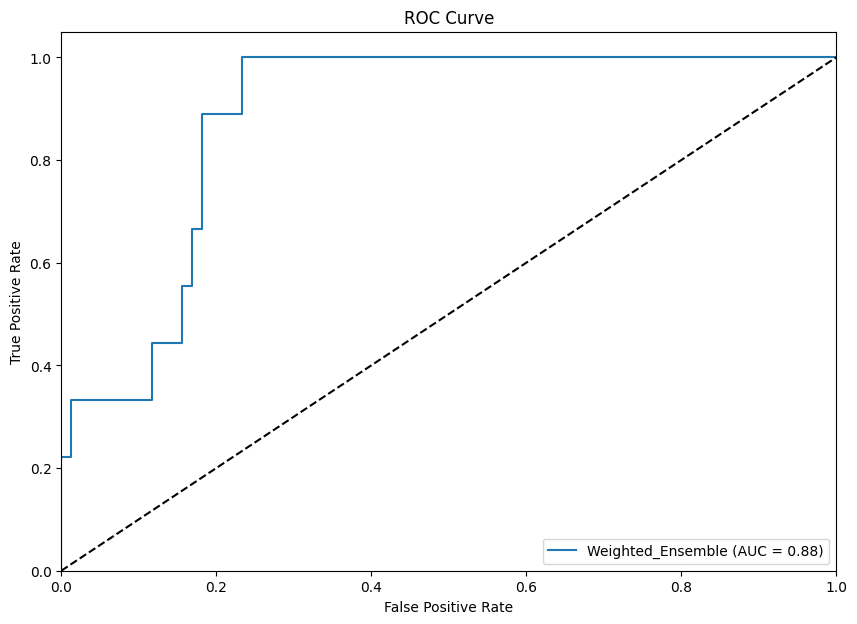

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


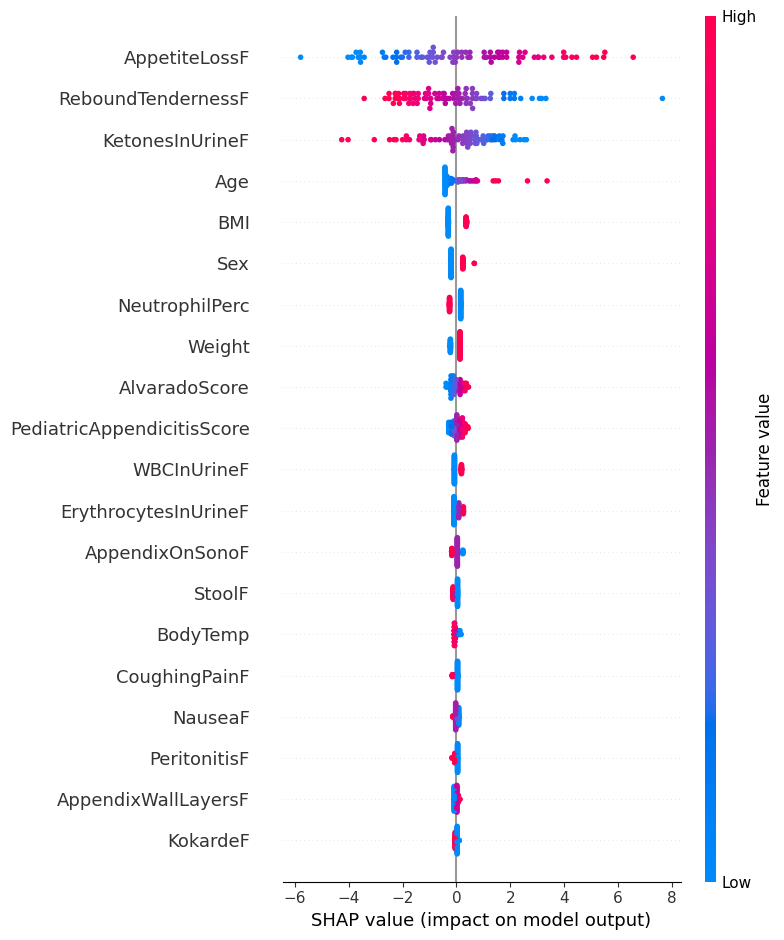

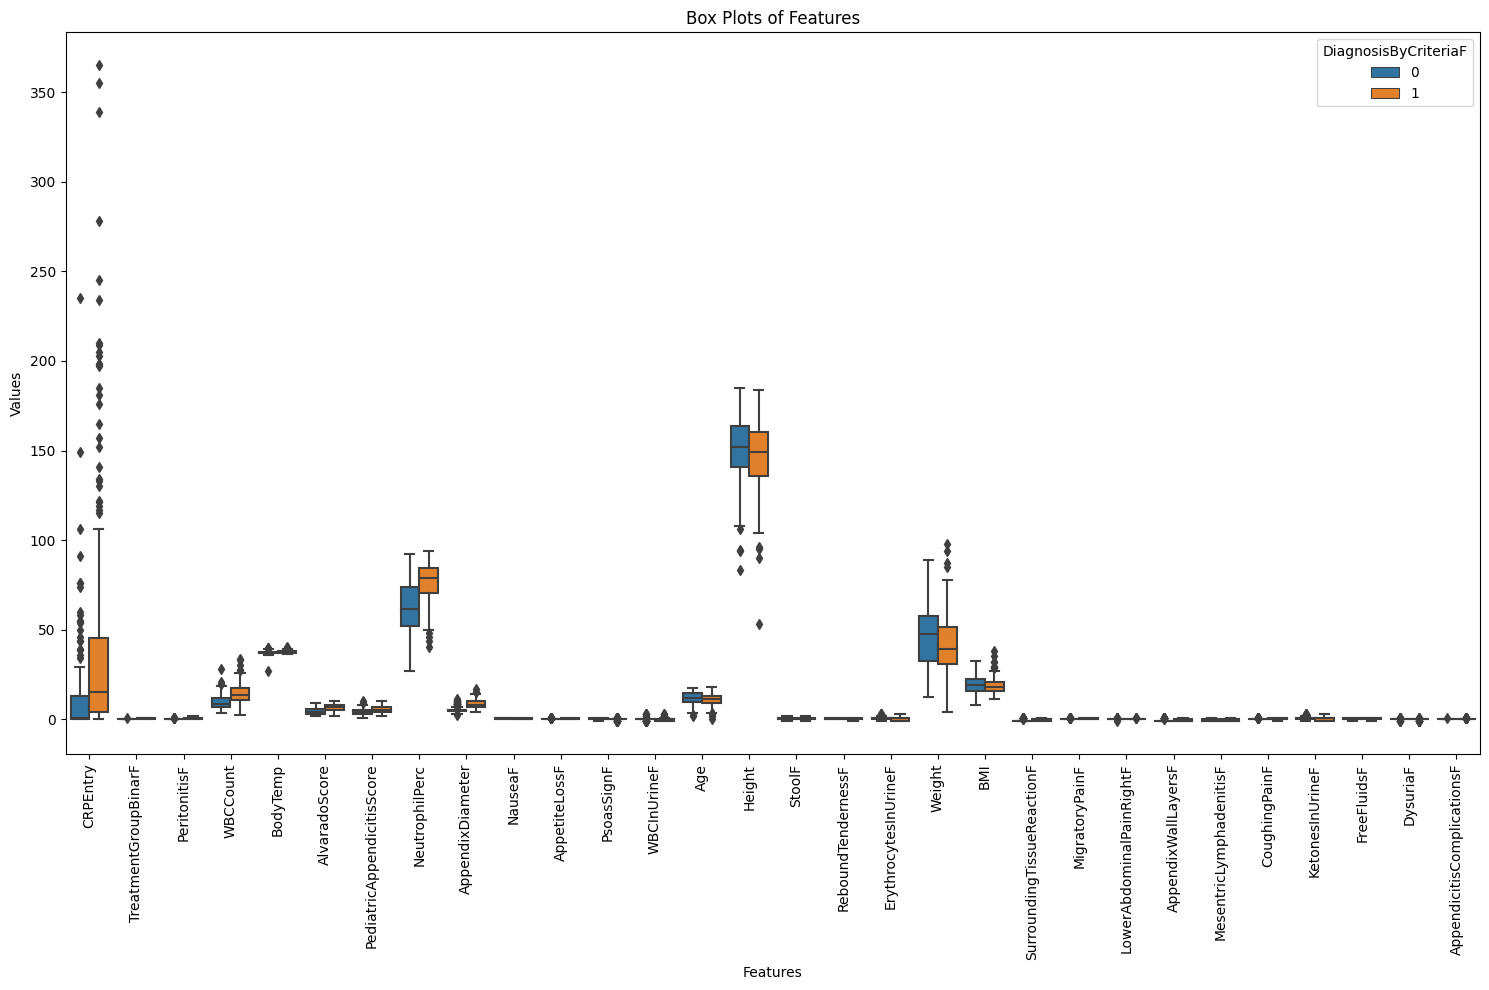

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


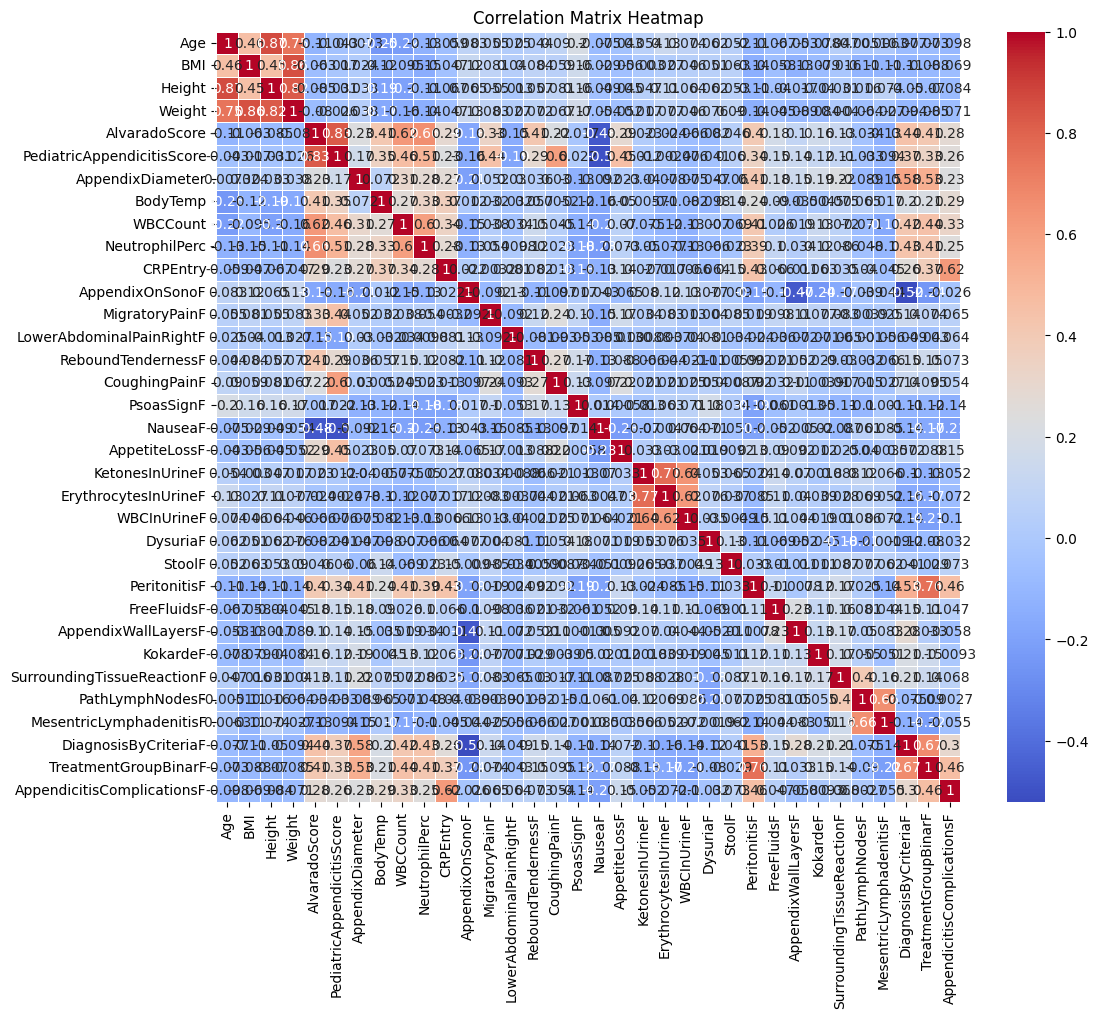

In [ ]:

##########AppendicitisComplications

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score




df = pd.read_csv("/content/drive/MyDrive/Dataset/appendicities.csv")



#num_of_rows = len(df)
#41 feature and 430 rows
#print(df.isnull().sum())



df.replace({"NA": float("nan"), "NaN": float("nan")}, inplace=True)  # standardize missing values.... inplace true means update main dataset
# drop uwanted columns, missing values more than 75%
df=df.drop(['TissuePerfusion'],axis=1)
df=df.drop(['BowelWallThick'],axis=1)
df=df.drop(['Ileus'],axis=1)
df=df.drop(['FecalImpaction'],axis=1)
df=df.drop(['Meteorism'],axis=1)
df=df.drop(['Enteritis'],axis=1)




# Fill missing values with interpolation
df.interpolate(method='linear', inplace=True)
# Linear interpolation is a method for estimating values between two known data points by assuming a linear relationship between them.
#It calculates values for missing data points by drawing a straight line between two adjacent data points and finding the value that lies on that line.




# factorization to convert categorical values to numerical value. Label encoding is simply
# assigning an integer value to every possible value of a categorical variable
# It assigns a unique numerical code to each unique category in the column.

#(array([0, 1, 1, 0, 2]), Index(['Cat', 'Dog', 'Fish'], dtype='object'))
# The first element (at index 0) is an array containing the numerical factors corresponding to the original categorical values


df['AppendixOnSonoF'] = pd.factorize(df['AppendixOnSono'])[0]
df['MigratoryPainF'] = pd.factorize(df['MigratoryPain'])[0]
df['LowerAbdominalPainRightF'] = pd.factorize(df['LowerAbdominalPainRight'])[0]
df['ReboundTendernessF'] = pd.factorize(df['ReboundTenderness'])[0]
df['CoughingPainF'] = pd.factorize(df['CoughingPain'])[0]
df['PsoasSignF'] = pd.factorize(df['PsoasSign'])[0]
df['NauseaF'] = pd.factorize(df['Nausea'])[0]
df['AppetiteLossF'] = pd.factorize(df['AppetiteLoss'])[0]
df['KetonesInUrineF'] = pd.factorize(df['KetonesInUrine'])[0]
df['ErythrocytesInUrineF'] = pd.factorize(df['ErythrocytesInUrine'])[0]
df['WBCInUrineF'] = pd.factorize(df['WBCInUrine'])[0]
df['DysuriaF'] = pd.factorize(df['Dysuria'])[0]
df['StoolF'] = pd.factorize(df['Stool'])[0]
df['PeritonitisF'] = pd.factorize(df['Peritonitis'])[0]
df['FreeFluidsF'] = pd.factorize(df['FreeFluids'])[0]
df['AppendixWallLayersF'] = pd.factorize(df['AppendixWallLayers'])[0]
df['KokardeF'] = pd.factorize(df['Kokarde'])[0]
df['SurroundingTissueReactionF'] = pd.factorize(df['SurroundingTissueReaction'])[0]
df['PathLymphNodesF'] = pd.factorize(df['PathLymphNodes'])[0]
df['MesentricLymphadenitisF'] = pd.factorize(df['MesentricLymphadenitis'])[0]
df['DiagnosisByCriteriaF'] = pd.factorize(df['DiagnosisByCriteria'])[0]
df['TreatmentGroupBinarF'] = pd.factorize(df['TreatmentGroupBinar'])[0]
df['AppendicitisComplicationsF'] = pd.factorize(df['AppendicitisComplications'])[0]





# drop actual columns

df=df.drop(['AppendixOnSono'],axis=1)
df=df.drop(['MigratoryPain'],axis=1)
df=df.drop(['LowerAbdominalPainRight'],axis=1)
df=df.drop(['ReboundTenderness'],axis=1)
df=df.drop(['CoughingPain'],axis=1)
df=df.drop(['PsoasSign'],axis=1)
df=df.drop(['Nausea'],axis=1)
df=df.drop(['AppetiteLoss'],axis=1)
df=df.drop(['KetonesInUrine'],axis=1)
df=df.drop(['ErythrocytesInUrine'],axis=1)
df=df.drop(['WBCInUrine'],axis=1)
df=df.drop(['Dysuria'],axis=1)
df=df.drop(['Stool'],axis=1)
df=df.drop(['Peritonitis'],axis=1)
df=df.drop(['FreeFluids'],axis=1)
df=df.drop(['AppendixWallLayers'],axis=1)
df=df.drop(['Kokarde'],axis=1)
df=df.drop(['SurroundingTissueReaction'],axis=1)
df=df.drop(['PathLymphNodes'],axis=1)
df=df.drop(['MesentricLymphadenitis'],axis=1)

df=df.drop(['DiagnosisByCriteria'],axis=1)
df=df.drop(['TreatmentGroupBinar'],axis=1)
df=df.drop(['AppendicitisComplications'],axis=1)



# define test and train
X = df.drop('AppendicitisComplicationsF', axis=1)
y = df['AppendicitisComplicationsF']







correlations = df.corr()['AppendicitisComplicationsF'].abs().sort_values(ascending=False)
k = 30  # You can adjust this value as needed
selected_features = correlations.index[1:k+1]  # Exclude the target variable
X_selected = X[selected_features]

# Split the data into training and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Use KNNImputer to impute missing values
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


#####WEIGHTED ENSAMBLE MODEL BUILDING:::::::::::
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg.fit(X_train_imputed, y_train)
random_forest.fit(X_train_imputed, y_train)
     # Make predictions on the test data using the individual models
y_pred_log_reg = log_reg.predict(X_test_imputed)
y_pred_random_forest = random_forest.predict(X_test_imputed)
    # Define weights for the models
weight_log_reg = 0.6
weight_random_forest = 0.4
    # Calculate the weighted ensemble predictions
weighted_ensemble_pred = (weight_log_reg * y_pred_log_reg + weight_random_forest * y_pred_random_forest).round()



#####CALCULATE MSE<MAE, R2, F1, CONFUSION MATRIX, AUC, ROC, MCC, SENSITIVITY:::::::::
acc_weighted_ensemble = accuracy_score(y_test, weighted_ensemble_pred)
mae_weighted_ensemble = mean_absolute_error(y_test, weighted_ensemble_pred)
mse_weighted_ensemble = mean_squared_error(y_test, weighted_ensemble_pred)
r2_weighted_ensemble = r2_score(y_test, weighted_ensemble_pred)
conf_matrix_weighted_ensemble = confusion_matrix(y_test, weighted_ensemble_pred)
y_prob_weighted_ensemble = (weight_log_reg * log_reg.predict_proba(X_test_imputed)[:, 1] +
                            weight_random_forest * random_forest.predict_proba(X_test_imputed)[:, 1])
fpr_weighted_ensemble, tpr_weighted_ensemble, _ = roc_curve(y_test, y_prob_weighted_ensemble)
auc_weighted_ensemble = roc_auc_score(y_test, y_prob_weighted_ensemble)
f1_weighted_ensemble = f1_score(y_test, weighted_ensemble_pred)
mcc_weighted_ensemble = matthews_corrcoef(y_test, weighted_ensemble_pred)
sensitivity_weighted_ensemble = recall_score(y_test, weighted_ensemble_pred)





print("Weighted Ensemble Metrics:")
print("Accuracy:", acc_weighted_ensemble)
print("Mean Absolute Error:", mae_weighted_ensemble)
print("Mean Squared Error:", mse_weighted_ensemble)
print("R-squared:", r2_weighted_ensemble)
print("Confusion Matrix (Weighted Ensamble):\n", conf_matrix_weighted_ensemble)
print("F1 Score (weighted ensemble):", f1_weighted_ensemble)
print("MCC (weighted ensemble):", mcc_weighted_ensemble)
print("Sensitivity (weighted ensemble):", sensitivity_weighted_ensemble)
print("AUC (weighted ensemble):", auc_weighted_ensemble)


#####PRINT ROC CURVE::::::::
plt.figure(figsize=(10, 7))  #This line creates a new figure for the ROC curve plot with a specified figure size of 10 inches in width and 7 inches in height.
plt.plot(fpr_weighted_ensemble, tpr_weighted_ensemble, label='Weighted_Ensemble (AUC = {:.2f})'.format(auc_weighted_ensemble))
#fpr_logreg (false positive rate) on the x-axis and tpr_logreg (true positive rate) on the y-axis.
#plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--') #adds a dashed diagonal line (45-degree line) to the plot, representing the ROC curve for a random classifier
plt.xlim([0.0, 1.0])#sets the limits for the x-axis, specifying the range from 0 to 1.
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right') # ensure lebels will be on lower right
plt.show()









#####SHAP CALCULATION FOR WEIGHTED ENSAMBLE MODEL:::::::::::
explainer_log_reg = shap.Explainer(log_reg, X_train_imputed)
shap_values_log_reg = explainer_log_reg(X_test_imputed)
explainer_rf = shap.TreeExplainer(random_forest)
shap_values_rf = explainer_rf(X_test_imputed)
#print("Shape of X_test_imputed:", X_test_imputed.shape)
#print("Shape of shap_values_log_reg:", shap_values_log_reg.shape)
#print("Shape of shap_values_rf:", shap_values_rf.shape)
shap_values_rf_selected = shap_values_rf[:, :, 1]
shap_values_weighted_ensemble = (
    weight_log_reg * shap_values_log_reg + weight_random_forest * shap_values_rf_selected
)
shap.summary_plot(shap_values_weighted_ensemble, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Ensemble Model)")
plt.show()
#shap.summary_plot(shap_values_log_reg, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Logistic Regression)")
#plt.show()
#shap.summary_plot(shap_values, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Random Forest)")
#shap_values_combined = np.concatenate((shap_values_log_reg[:, :, np.newaxis], shap_values_rf_selected[:, :, np.newaxis]), axis=2)

# Now you can use shap_values_combined for the summary plot
#shap.summary_plot(shap_values_combined, X_test_imputed, feature_names=X.columns, title="SHAP Summary Plot (Ensemble Model)")
#plt.show()





###############################################################
#Receiver Operating Characteristic (ROC)
#y_test: The true binary labels for the testing data. These are the actual outcomes you are trying to predict
#y_prob_logreg: The predicted probabilities of belonging to the positive class for the testing data, which you calculated in the previous step.
#fpr_logreg: An array of false positive rates (FPR) at various thresholds.
#tpr_logreg: An array of true positive rates (TPR), which is also the same as the sensitivity or recall, at various thresholds.
#_: This variable is a placeholder for thresholds
#The ROC curve is a graphical representation of a binary classifier's performance
#It plots the true positive rate (TPR) on the y-axis (also known as sensitivity or recall) against the false positive rate (FPR) on the x-axis.


# Calculate AUC
#AUC, which is a measure of the classifier's ability to distinguish between positive and negative classes.
#A higher AUC value indicates better classification performance.
#A perfect classifier has an AUC of 1
###############################################################







# BOXPLOT OF ALL FEATURES::::::::::::::::
plt.figure(figsize=(15, 10))
df_box = pd.concat([X_train, y_train], axis=1)   #merge test and train data for box
melted_df = df_box.melt(id_vars='DiagnosisByCriteriaF', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='DiagnosisByCriteriaF', data=melted_df) #The 'DiagnosisByCriteriaF' column is used for coloring the boxes, effectively distinguishing different categories.
plt.title('Box Plots of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='DiagnosisByCriteriaF', loc='upper right')
plt.tight_layout() #This line ensures that the plot elements are appropriately arranged and spaced for better visual presentation.
plt.show()


# VISUALIZATION OF CORRELATION USING HEATMAP::::::::::
correlation_matrix = df.corr()
#This line calculates the correlation coefficients between all pairs of numerical features in the DataFrame df.
#The result is stored in the variable correlation_matrix, which becomes a square matrix where each entry represents the correlation between two features.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # add annotation, 0.5 width of the lines that separate the cells in the heatmap.
plt.title("Correlation Matrix Heatmap")
plt.show()